# k-means Algorithm

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#using the isis dataset
dat=pd.read_csv('C:/Users/HP/Desktop/iris.csv')

In [9]:
#using petal width and petal length
dat=dat.ix[:,2:]
dat.head()

,Petal.Length,Petal.Width,Species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [10]:
#seperating the classes
setosa=dat.ix[dat['Species']=='setosa',:2]
versicolor=dat.ix[dat['Species']=='versicolor',:2]
virginica=dat.ix[dat['Species']=='virginica',:2]

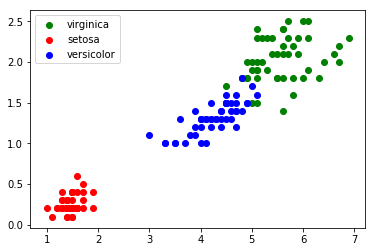

In [11]:
plt.scatter(virginica['Petal.Length'],virginica['Petal.Width'],color='g',label='virginica')
plt.scatter(setosa['Petal.Length'],setosa['Petal.Width'],color='r',label='setosa')
plt.scatter(versicolor['Petal.Length'],versicolor['Petal.Width'],color='b',label='versicolor')
plt.legend(loc='best')

### We will be using k-means to seperate the dataset into three classes.

In [12]:
#algorithm for k-means 
def kmeans(dat1,clusters,iterations):
#assigning random points as centroid of initial cluster
    index=np.random.permutation(dat1.index)[:clusters]
    
    cluster=list()
    label=list()
    sse=[]
    d=dict()
    for i in index:
        cluster.append(np.array(dat1.ix[i,:]))
#calculating the distance of each datapoint from the clusters and assigning label to minimum distance
    for i in range(len(dat1)):
        dist=list()
        for j in range(len(cluster)):
            dist.append(np.sum((np.array(dat1.ix[i])-cluster[j])**2))
        label.append(np.argmin(dist))
    dat1['label']=np.array(label)
    for i in range(iterations):
#calculating mean of clusters as new centroid
        cluster=list()
        label=list()
        for i in np.unique(dat1['label']):
            cluster.append(np.array(np.mean(dat1.ix[dat1['label']==i,:-1])))
#calculating the distance of each datapoint from the clusters and assigning label to minimum distance
        for i in range(len(dat1)):
            dist=list()
            for j in range(len(cluster)):
                dist.append(np.sum((np.array(dat1.ix[i,:-1])-cluster[j])**2))
            label.append(np.argmin(dist))
        dat1['label']=np.array(label)
#calculating the sum of squared error of individual cluster
    for i in range(len(cluster)):
        sse.append(np.sum((np.array(dat1.ix[dat1['label']==i,:-1])-cluster[i])**2))
#calculating the total sum of squared error
    totalsse=np.array(sse).sum()
    d['clustermean']=cluster
    d['data']=dat1
    d['sse']=sse
    d['totalsse']=totalsse
    return d

In [22]:
dic=kmeans(dat.ix[:,:2],3,20)#using kmeans algorithm to seprate the data points into three clusters

In [23]:
dat1=dic['data']
dat1.head()

,Petal.Length,Petal.Width,label
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [24]:
#seperating the dataset according to the three labels
l0=dat1.ix[dat1['label']==0,:2]
l1=dat1.ix[dat1['label']==1,:2]
l2=dat1.ix[dat1['label']==2,:2]

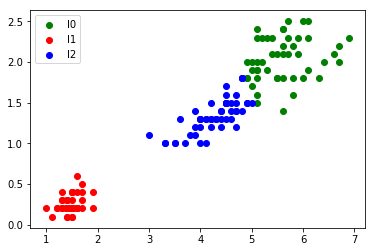

In [25]:
#plotting the same 
plt.scatter(l0['Petal.Length'],l0['Petal.Width'],color='g',label='l0')
plt.scatter(l1['Petal.Length'],l1['Petal.Width'],color='r',label='l1')
plt.scatter(l2['Petal.Length'],l2['Petal.Width'],color='b',label='l2')
plt.legend(loc='best')

The figure looks same like the actual figure drawn above,which means that k-means algorithm was able to seperate the three classes

In [17]:
dic['sse']

[14.22740740740741, 15.163478260869566, 2.0220000000000002]

In [18]:
dic['totalsse']

31.412885668276978

In [20]:
dic['clustermean']

[array([ 4.29259259,  1.35925926]),
 array([ 5.62608696,  2.04782609]),
 array([ 1.462,  0.246])]